In [2]:
import Pkg

In [3]:
using QuadGK
using Polynomials

# ZADANIE 1

In [4]:
function legendre(k)
    x = Poly([0,1])
    p0 = Poly([1])
    p1 = x
    if k == 0
        return p0
    elseif k == 1
        return p1
    end
    for i = 2:k
        p2 = ((2i-1)/i)*x*p1 - ((i-1)/i)*p0
        p0 = p1
        p1 = p2
    end
    return p1
end

legendre (generic function with 1 method)

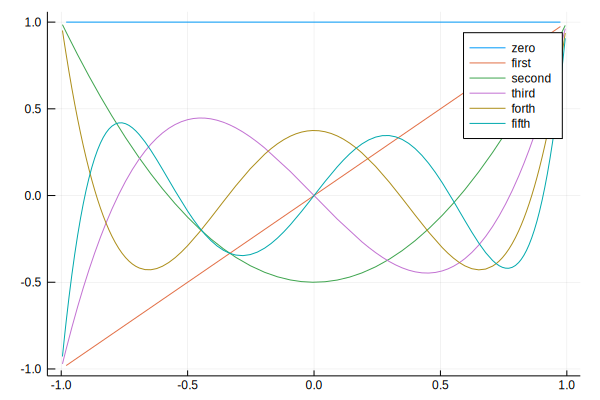

In [5]:
using Plots
plot(x->legendre(0)(x),-1,1,label="zero")
plot!(x->legendre(1)(x),-1,1,label="first")
plot!(x->legendre(2)(x),-1,1,label="second")
plot!(x->legendre(3)(x),-1,1,label="third")
plot!(x->legendre(4)(x),-1,1,label="forth")
plot!(x->legendre(5)(x),-1,1,label="fifth")

In [6]:
roots(legendre(2)), gauss(Float64,2)[1]

([-0.57735, 0.57735], [-0.57735, 0.57735])

In [7]:
roots(legendre(3)), gauss(Float64,3)[1]

([-0.774597, 0.774597, 0.0], [-0.774597, 0.0, 0.774597])

In [8]:
roots(legendre(4)), gauss(Float64,4)[1]

([-0.861136, 0.861136, -0.339981, 0.339981], [-0.861136, -0.339981, 0.339981, 0.861136])

## Podstawowe twierdzenie kwadratur Gaussa
Odcięte $x_i$ n-punktowej kwadratury Gaussa z funkcją ważącą w(x) 
w [a,b] są zerami wielomianu ortogonalnego $φ_{n}(x)$ dla tego samego przedziału i tej samej funkcji ważącej

${φ_{i}}^{n}_{i}=0$ - zbiór wielomianów ortogonalnych w [a,b]
$φ_{n}(x)$ - ma n różnych zer $x_{1},x_{2},...,$

$f(x) = \sum_{i=1}^{n} \prod_{j=1,j\neq i}^{n} \frac{x-x_{j}}{x_{i}-x_{j}} f(x_{i}) + \frac{f^{n}(η(x))}{n!} \prod_{i=1}^{n}(x-x_{i})$

(*) $\int\limits_{a}^{b}w(x)f(x)dx \approx \sum_{i=1}^{n}a_{i}f(x_{i}), a_{i}=\int\limits_{a}^{b}w(x)L_{i}(x)dx$

stopień dokładności $\le$ n − 1 bo $f^{n}(η)$

# ZADANIE 2

In [9]:
function myGauss(k,f)
   (xp,a) = gauss(Float64,k)
    sum(a .* f.(xp)) 
end

myGauss (generic function with 1 method)

In [10]:
myGauss(7,x -> x^2)

0.6666666666666669

In [11]:
myGauss(3,x -> 2+3*x+x*x*x)

3.999999999999999

In [12]:
isapprox(myGauss(7,x -> x^2),quadgk(x -> x^2,-1,1)[1])

true

In [13]:
isapprox(myGauss(3,x -> 2+3*x+x*x*x),quadgk(x -> 2+3*x+x*x*x,-1,1)[1])

true

In [14]:
isapprox(1.2e-323, 0)

false

In [15]:
isapprox(1.2e-324, 0)

true

In [16]:
using DataFrames

In [17]:
compare = DataFrame(k = Int64[], myGauss = Float64[], quadqk = Float64[], approx = Bool[])
d = Int64[]
for i in 1:1:20
    append!(d,[Int64(i)])
    p = poly(d)
    for k in 1:1:5
        a = myGauss(k,p)
        b = quadgk(p,-1,1)[1]
        push!(compare,[k, a, b, (isapprox(a,b))])     
    end
end 

In [18]:
compare

,k,myGauss,quadqk,approx
,Int64,Float64,Float64,Bool
1,1,-2.0,-2.0,true
2,2,-2.0,-2.0,true
3,3,-2.0,-2.0,true
4,4,-2.0,-2.0,true
5,5,-2.0,-2.0,true
6,1,4.0,4.66667,false
7,2,4.66667,4.66667,true
8,3,4.66667,4.66667,true
9,4,4.66667,4.66667,true


┌ Warning: In the future eachcol will have names argument set to false by default
│   caller = getmaxwidths(::DataFrame, ::UnitRange{Int64}, ::UnitRange{Int64}, ::Symbol) at show.jl:105
└ @ DataFrames /Applications/JuliaPro-1.0.1.1.app/Contents/Resources/pkgs-1.0.1.1/packages/DataFrames/5Rg4Y/src/abstractdataframe/show.jl:105


## Twierdzenie o stopniu dokładności kwadratury Gaussa
Teza:
Kwadratura ma stopień dokładności 2n − 1, tzn. jest dokładna dla wielomianu:

$P(x) = Q(x) · φ_{n}(x) + R(x)$ Q, R−stopnia < n

# ZADANIE 3

In [19]:
function intAB(a,b,f)
    fz(z) = f((b+a)/2 + (b-a)/2*z)
    return ((b-a)/2*myGauss(5,fz))
end

intAB (generic function with 1 method)

In [20]:
intAB(-1,1,x -> x^2)

0.6666666666666667

In [21]:
isapprox(intAB(-1,1,x -> x^2),quadgk(x -> x^2,-1,1)[1])

true

In [22]:
intAB(-1,1,x -> 2+3*x+x*x*x)

3.9999999999999996

In [23]:
isapprox(intAB(-1,1,x -> 2+3*x+x*x*x),quadgk(x -> 2+3*x+x*x*x,-1,1)[1])

true

In [24]:
compare2 = DataFrame(a = Int64[], b = Int64[], intAB = Float64[], quadqk = Float64[], approx = Bool[])
d = Int64[]
a = -1
b = 1
for i in 1:1:20
    append!(d,[Int64(i)])
    p = poly(d)
    x = intAB(a,b,p)
    y = quadgk(p,a,b)[1]
    push!(compare2,[a,b,x,y,(isapprox(x,y))])
    a = a-1
    b = b+1
end 
compare2

,a,b,intAB,quadqk,approx
,Int64,Int64,Float64,Float64,Bool
1,-1,1,-2.0,-2.0,true
2,-2,2,13.3333,13.3333,true
3,-3,3,-144.0,-144.0,true
4,-4,4,2094.93,2094.93,true
5,-5,5,-38700.0,-38700.0,true
6,-6,6,8.66798e5,8.66798e5,true
7,-7,7,-2.28384e7,-2.28384e7,true
8,-8,8,6.9219e8,6.9219e8,true
9,-9,9,-2.3726e10,-2.3726e10,true


# ZADANIE 4

In [25]:
quadgk(x->2+x-x*x,-1,1)

(3.333333333333333, 0.0)

In [26]:
normalGaussFun(x) = (1/√(2*pi))*exp((-x^2)/2)

normalGaussFun (generic function with 1 method)

In [27]:
quadgk(normalGaussFun,-Inf,+Inf)

(1.0000000000032583, 1.4395584941504537e-8)

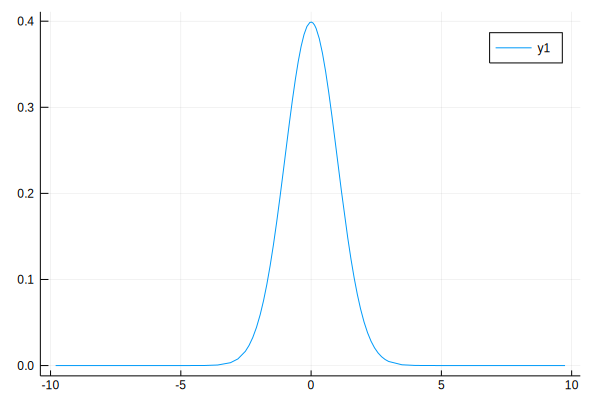

In [28]:
plot(x->normalGaussFun(x),-10,10)

# ZADANIE 5

In [29]:
function midPointRule(f,a,b,n)
    res = 0
    start = a
    range = (b-a)/n
    for i in (a+range):range:b
        res += f((i+start)/2)*range
        start = i
    end
    return res
end

midPointRule (generic function with 1 method)

In [35]:
a = 5
b = -5
p = Poly([4,2,5,1,0,9,1,5,2,6])
results = DataFrame(n=Int64[],myFun=Float64[],quadgk=Float64[],approx=Bool[],error=Float64[])
for i in 1:1:10
    x = midPointRule(p,a,b,i)
    y = quadgk(p,a,b)[1]
    push!(results,[i,x,y,isapprox(x,y),abs(x-y)])
end

In [36]:
results

,n,myFun,quadgk,approx,error
,Int64,Float64,Float64,Bool,Float64
1,1,-40.0,-8.90834e5,false,8.90794e5
2,2,-33311.5,-8.90834e5,false,8.57522e5
3,3,-2.12776e5,-8.90834e5,false,6.78057e5
4,4,-4.0548e5,-8.90834e5,false,4.85354e5
5,5,-543416.0,-8.90834e5,false,3.47418e5
6,6,-4.30878e6,-8.90834e5,false,3.41795e6
7,7,-6.95556e5,-8.90834e5,false,1.95277e5
8,8,-7.37768e5,-8.90834e5,false,1.53066e5
9,9,-7.67932e5,-8.90834e5,false,1.22901e5


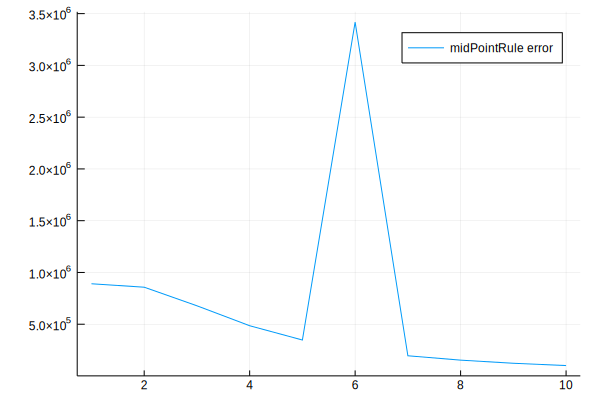

In [37]:
plot(results[:n], results[:error], label="midPointRule error")

In [40]:
a = 5
b = -5
p = Poly([6,0,0,0,0,1,2,0])
results = DataFrame(n=Int64[],myFun=Float64[],quadgk=Float64[],approx=Bool[],error=Float64[])
for i in 1:1:100
    x = midPointRule(p,a,b,i)
    y = quadgk(p,a,b)[1]
    push!(results,[i,x,y,isapprox(x,y),abs(x-y)])
end

In [41]:
results

,n,myFun,quadgk,approx,error
,Int64,Float64,Float64,Bool,Float64
1,1,-60.0,-44702.9,false,44642.9
2,2,-4942.81,-44702.9,false,39760.0
3,3,-18349.9,-44702.9,false,26353.0
4,4,-27907.3,-44702.9,false,16795.6
5,5,-33340.0,-44702.9,false,11362.9
6,6,-21215.6,-44702.9,false,23487.3
7,7,-38625.1,-44702.9,false,6077.78
8,8,-39996.3,-44702.9,false,4706.55
9,9,-40955.1,-44702.9,false,3747.76


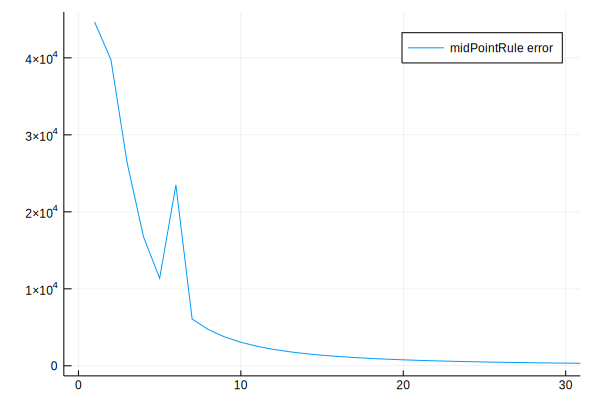

In [44]:
plot(results[:n], results[:error], label="midPointRule error", xlims=[0,30])